# Regression Analysis for Insurance Data

Importing necessary libraries

In [2]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Loading the dataset

In [3]:
# Load the dataset
file_path = 'C:/Users/Sohaib/Documents/ATOM CAMP/ML/Practice Session duer to absence of instructor/insurance.csv'
df = pd.read_csv(file_path)

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Data Preprocessing:
1. Handle missing or anomalous data.
2. Convert categorical variables (sex, smoker, region) into numerical formats using encoding techniques (e.g., one-hot encoding).
3. Normalize/standardize numerical features if required.

1. Handle missing or anomalous data.

Checking: 
Null values 
Types of data 
Number of Unique Values
Duplicate Values 
Shape of the data
Null Values
Summary Statistics

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info() #number of columns and non null count and data types
df.dtypes #only data types 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.nunique() #Number of unique values in the columns

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
duplicate_counts = {}

# Iterating over each column in the DataFrame
for column in df.columns:
    total_count = df[column].count()
    unique_count = df[column].nunique()
    duplicate_counts[column] = total_count - unique_count

print(duplicate_counts)

{'age': 1291, 'sex': 1336, 'bmi': 790, 'children': 1332, 'smoker': 1336, 'region': 1334, 'charges': 1}


In [9]:
df.duplicated().value_counts()

False    1337
True        1
Name: count, dtype: int64

Certainly we have one duplicate value 

In [10]:
df = df.drop_duplicates() # dropping the duplicate value

In [11]:
df.shape # number of rows and colums after dropping the duplicate value

(1337, 7)

In [12]:
# Get summary statistics statistics
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


1. Count: There are 1337 non-null entries.
-Mean: Average value for each column.
-Age: Average age 39.22 years.
-BMI: Average BMI is 30.66. A BMI over 30 is generally considered obese.
-Children: Average no. of children 1.10.
-Charges: Average of charges is 13,279.12.

2. Standard Deviation: 
-SD is a the amount of variation or dispersion in the data.
-Age: SD = 14.04 suggests a moderate spread in ages.
-BMI: SD = 6.10 indicates a moderate variation in BMI values.
-Children: SD = 1.21 suggests most entries have a similar number of children, with a few having above.
-Charges: SD = 12,110.36 suggests a wide range of charges, including those higher or lower than the average.

3. Min: The smallest value in each column.

-Age: The youngest age is 18 years.
-BMI: The lowest BMI is 15.96.
-Children: There are fields with zero children.
-Charges: The lowest charge is 1,121.87.

4. 25% (1st Quartile): 25% of the data is below these values.
-Age: 25% of the people are younger than 27 years.
-BMI: 25% of the BMI values are below 26.29.
-Children: 25% of the entries have no children.
-Charges: 25% of the charges are less than 4,746.34.

5. 50% (Median): This is the median value of the data. 
-Age: The median age is 39 years.
-BMI: The median BMI is 30.40.
-Children: The median number of children is 1.
-Charges: The median charge is 9,386.16.

6. 75% (3rd Quartile): 75% of the data is below these values, and 25% is above.
Age: 75% of the people are younger than 51 years.
BMI: 75% of the BMI values are below 34.70.
Children: 75% of the fields have 2 or fewer children.
Charges: 75% of the charges are less than 16,657.72.

7. Max: The largest value in each column.
-Age: The oldest age is 64 years.
-BMI: The highest BMI is 53.13.
-Children: The most number of children are 5.
-Charges: The highest charge is 63,770.43

Important Information from previous steps

There are no missing values in the data._____
One field was duplicate therefore we have removed 

1. Convert categorical variables (sex, smoker, region) into numerical formats using encoding techniques (e.g., one-hot encoding).
2. Normalize/standardize numerical features if required.

In [13]:
# One-hot encoding the categorical variables: 'sex', 'smoker', and 'region'
encoded_data = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Display the first few rows of the dataset after encoding
encoded_overview = encoded_data.head()
encoded_overview


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [14]:
# Identifying the numerical columns (excluding the one-hot encoded columns)
numerical_cols = ['age', 'bmi', 'children', 'charges']

# Standardizing the numerical features
scaler = StandardScaler()
encoded_data[numerical_cols] = scaler.fit_transform(encoded_data[numerical_cols])

# Display the first few rows of the dataset after standardization
standardized_overview = encoded_data.head(15)
standardized_overview

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,True,False,False,True,False,False,False,True
1,-1.511647,0.509422,-0.079442,-0.954381,False,True,True,False,False,False,True,False
2,-0.799350,0.383155,1.580143,-0.729373,False,True,True,False,False,False,True,False
3,-0.443201,-1.305052,-0.909234,0.719104,False,True,True,False,False,True,False,False
4,-0.514431,-0.292456,-0.909234,-0.777499,False,True,True,False,False,True,False,False
5,-0.585661,-0.807363,-0.909234,-0.786604,True,False,True,False,False,False,True,False
6,0.482785,0.455307,-0.079442,-0.416207,True,False,True,False,False,False,True,False
7,-0.158282,-0.479397,1.580143,-0.495432,True,False,True,False,False,True,False,False
8,-0.158282,-0.136672,0.750351,-0.567719,False,True,True,False,True,False,False,False
9,1.480002,-0.790965,-0.909234,1.292271,True,False,True,False,False,True,False,False


# Exploratory Data Analysis (EDA):

1. Analyze the distribution of key variables (e.g., age, bmi, charges).
2. Investigate relationships between features and the target variable (charges).
3. Identify potential outliers or influential points.

1. Analyze the distribution of key variables (e.g., age, bmi, charges).

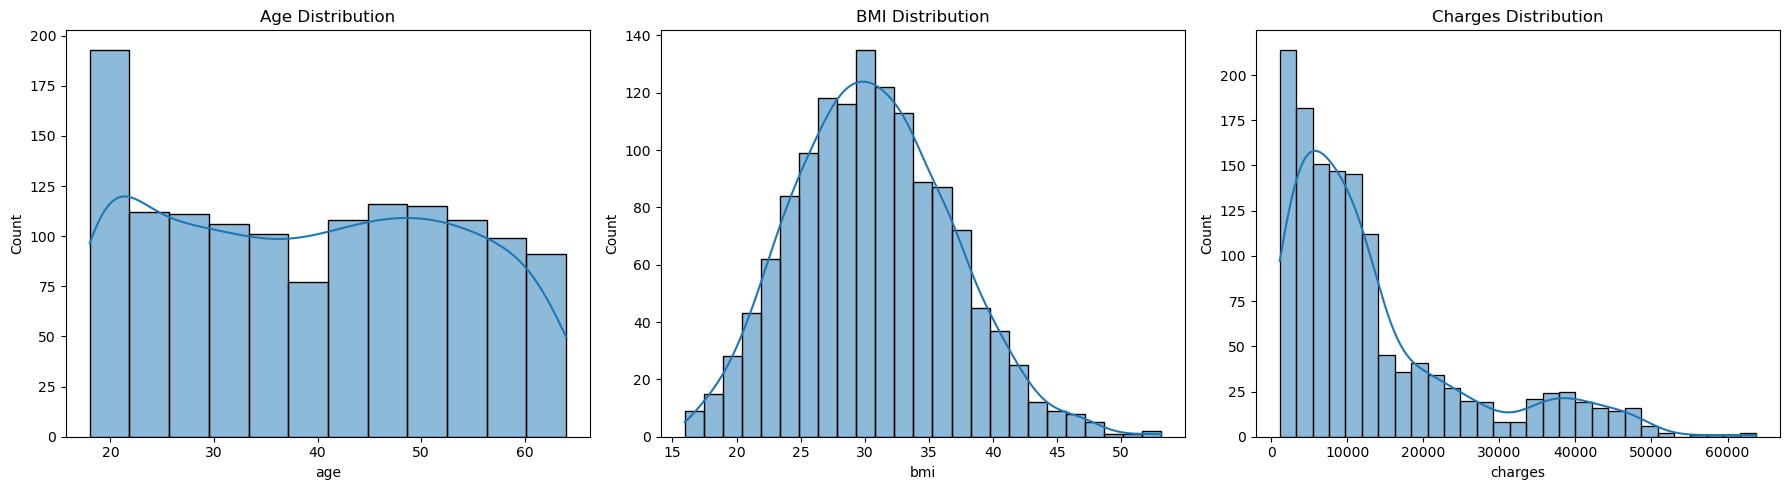

In [41]:
# Creating histograms and density plots for age, bmi, and charges

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Age Distribution
sns.histplot(df['age'], kde=True, ax=axes[0])
axes[0].set_title('Age Distribution')

# BMI Distribution
sns.histplot(df['bmi'], kde=True, ax=axes[1])
axes[1].set_title('BMI Distribution')

# Charges Distribution
sns.histplot(df['charges'], kde=True, ax=axes[2])
axes[2].set_title('Charges Distribution')


plt.tight_layout()
plt.show()

The histograms show that age has a left-skewed distribution with a higher frequency of younger individuals, BMI appears normally distributed centered around the 30 mark, and charges are right-skewed, indicating a higher frequency of lower charges with fewer instances of very high charges.

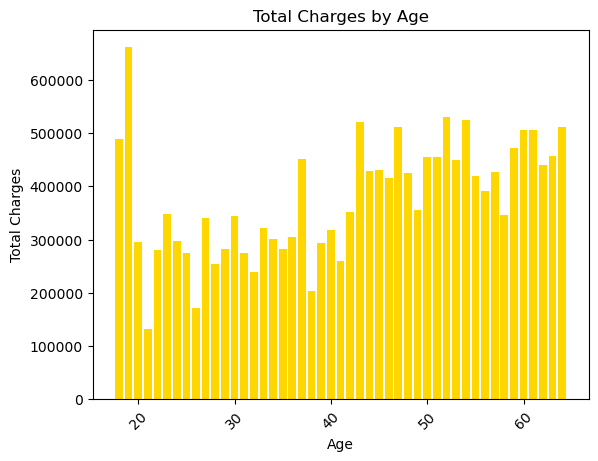

In [17]:
# Calculate the total charges by age
charges_by_age = df.groupby('age')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_age.index, charges_by_age.values, color='gold')

# Add labels and title
plt.xlabel('Age')

plt.ylabel('Total Charges')
plt.title('Total Charges by Age')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

The bar chart suggests total healthcare charges tend to increase with age. There are higher charges in the early 20s and again in the 60s.

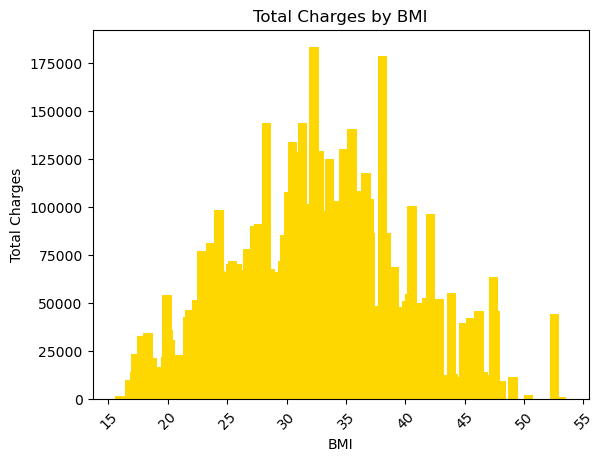

In [18]:
# Calculate the total charges by BMI
charges_by_bmi = df.groupby('bmi')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_bmi.index, charges_by_bmi.values, color='gold')

# Add labels and title
plt.xlabel('BMI')

plt.ylabel('Total Charges')
plt.title('Total Charges by BMI')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

The bar chart shows that total charges vary widely across different BMI values, with several peaks indicating higher total charges at certain BMI levels.

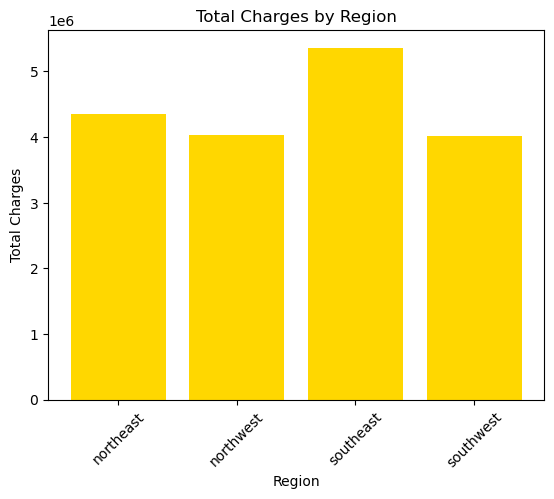

In [19]:
# Calculate the total charges by region
charges_by_region = df.groupby('region')['charges'].sum()

# Create a bar chart
plt.bar(charges_by_region.index, charges_by_region.values, color='gold')

# Add labels and title
plt.xlabel('Region')

plt.ylabel('Total Charges')
plt.title('Total Charges by Region')

# Rotate x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Display the chart
plt.show()

The bar chart indicates that the southeast region incurs the highest total healthcare charges compared to the northeast, northwest, and southwest regions.

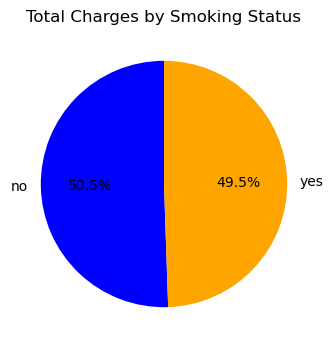

In [20]:
# Calculate the total charges by smoking status
charges_by_smoker = df.groupby('smoker')['charges'].sum()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(charges_by_smoker, labels=charges_by_smoker.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'orange'])

# Add title
plt.title('Total Charges by Smoking Status')

# Show the chart
plt.show()


The pie chart shows an almost even split in total charges between smokers and non-smokers, with smokers slightly less, highlighting the higher impact of smoking status on insurance costs.

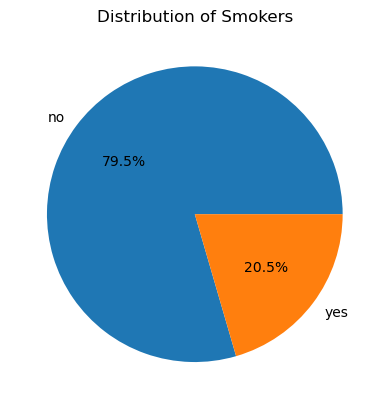

In [21]:
# Calculating the percentage of smokers and non smokers\
smoker_counts = df['smoker'].value_counts() 

# Create a pie chart
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%') 

# Add title
plt.title('Distribution of Smokers') 
plt.show()

The 20.5% are smokers and 79.5% are not.

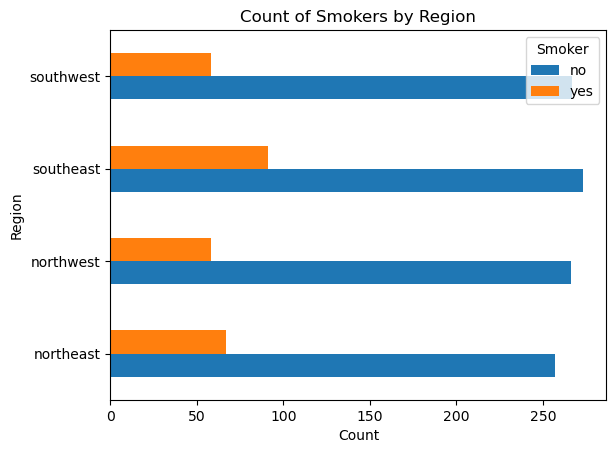

In [22]:
smokers_by_region = df.groupby('region')['smoker'].value_counts().unstack().fillna(0)
smokers_by_region.plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Smokers by Region')
plt.legend(title='Smoker', loc='upper right')
plt.show()

The above plot shows that the number of smokers in the southest region are higher, norhteast beign 2nd highest and there is a tie between south and north west  

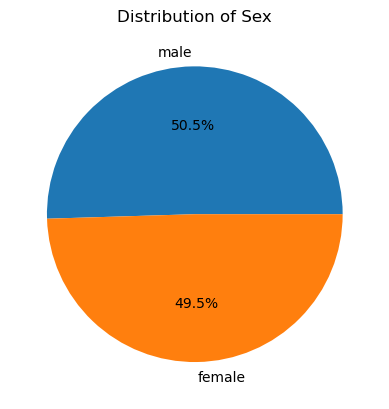

In [50]:
# Calculating the percentage of males and females
sex_count = df['sex'].value_counts() 

# Create a pie chart
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%') 

# Add title
plt.title('Distribution of Sex') 
plt.show()

Males are 50.5% & females are 49.5%

2. Investigate relationships between features and the target variable (charges).

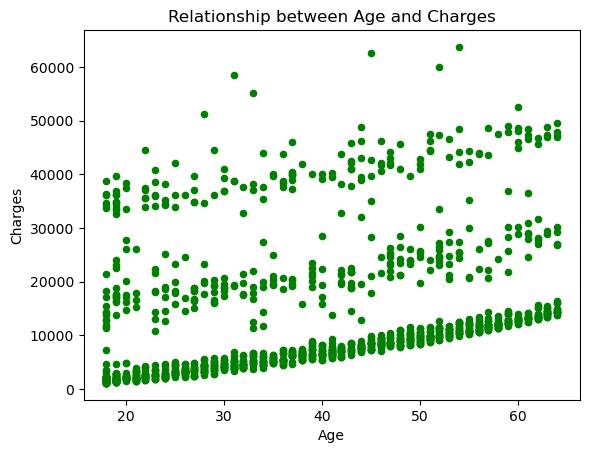

In [24]:
# relationship between age and charges using scatterplot
df.plot(kind='scatter', x='age', y='charges', color='g')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Relationship between Age and Charges')
plt.show()

The scatter plot suggests a positive correlation between age and charges, with a general trend of increasing charges as age increases, and a wide variance in charges at any given age.

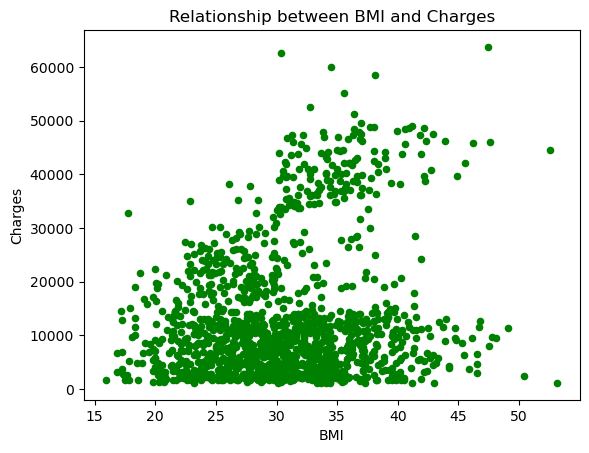

In [25]:
# relationship between age and charges using scatterplot
df.plot(kind='scatter', x='bmi', y='charges', color='g')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('Relationship between BMI and Charges')
plt.show()

The scatter plot suggests a positive correlation between BMI and charges, with a general trend of increasing charges as BMI increases. Means the charges will increase if the BMI increases.

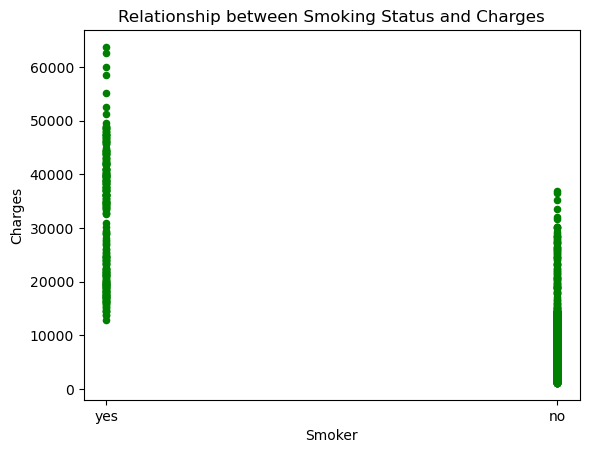

In [48]:
# relationship between age and charges using scatterplot
df.plot(kind='scatter', x='smoker', y='charges', color='g')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.title('Relationship between Smoking Status and Charges')
plt.show()

The scatter plot clearly indicates that smokers generally incur higher healthcare charges than non-smokers.

In [26]:
# Calculating the correlation matrix
correlation_matrix = standardized_overview.corr()

correlation_matrix

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,-0.089537,-0.103489,0.398692,0.599167,-0.599167,-0.014511,0.014511,-0.130905,0.214380,0.182271,-0.415480
bmi,-0.089537,1.000000,0.046249,0.090228,-0.172059,0.172059,-0.150249,0.150249,-0.184135,-0.480308,0.519134,0.047082
children,-0.103489,0.046249,1.000000,-0.359028,-0.082874,0.082874,0.310087,-0.310087,0.121626,0.046747,0.041437,-0.243252
charges,0.398692,0.090228,-0.359028,1.000000,0.197043,-0.197043,-0.682661,0.682661,-0.269236,0.161655,0.111978,-0.105398
sex_female,0.599167,-0.172059,-0.082874,0.197043,1.000000,-1.000000,-0.200446,0.200446,-0.366900,0.040291,0.196429,0.026207
sex_male,-0.599167,0.172059,0.082874,-0.197043,-1.000000,1.000000,0.200446,-0.200446,0.366900,-0.040291,-0.196429,-0.026207
smoker_no,-0.014511,-0.150249,0.310087,-0.682661,-0.200446,0.200446,1.000000,-1.000000,0.196116,0.301511,-0.200446,-0.294174
smoker_yes,0.014511,0.150249,-0.310087,0.682661,0.200446,-0.200446,-1.000000,1.000000,-0.196116,-0.301511,0.200446,0.294174
region_northeast,-0.130905,-0.184135,0.121626,-0.269236,-0.366900,0.366900,0.196116,-0.196116,1.000000,-0.236525,-0.366900,-0.153846
region_northwest,0.214380,-0.480308,0.046747,0.161655,0.040291,-0.040291,0.301511,-0.301511,-0.236525,1.000000,-0.564076,-0.236525


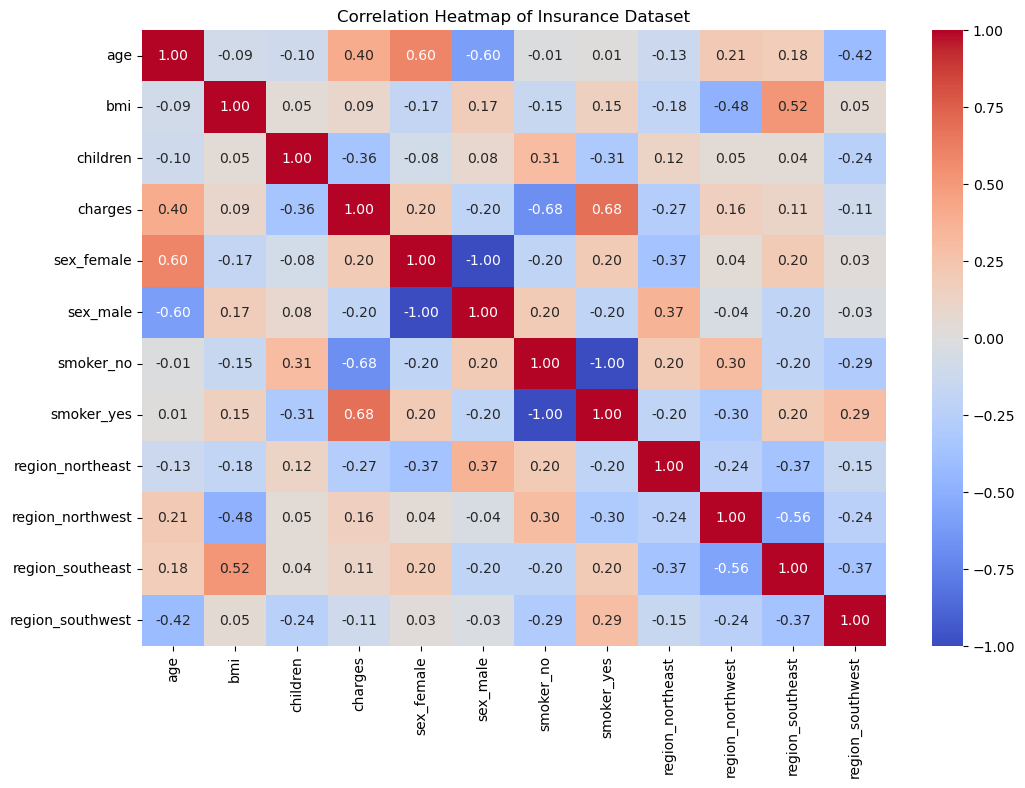

In [27]:
# Set the size of the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Show the heatmap
plt.title("Correlation Heatmap of Insurance Dataset")
plt.show()

1. Age has a moderate positive correlation with charges, implying charges tend to increase as age increases.
2. Being a smoker ('smoker_yes') shows a strong positive correlation with charges, indicating that smokers generally face higher charges.
3. BMI has a slight positive correlation with charges, suggesting higher BMI may have slightly higher charges.
4. 'smoker_no' has a moderate negative correlation with charges, indicating non-smokers tend to incur lower charges.
5. The presence of children shows a slight negative correlation with charges, suggesting that having more children might be associated with slightly lower charges.
6. 'region_southwest' has a small negative correlation with charges, indicating this region might have slightly lower charges compared to others.

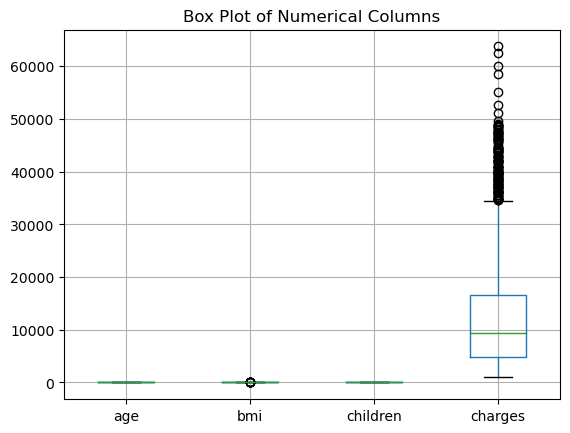

In [28]:
df.boxplot(column=['age','bmi','children','charges'])
plt.title('Box Plot of Numerical Columns')
plt.show()

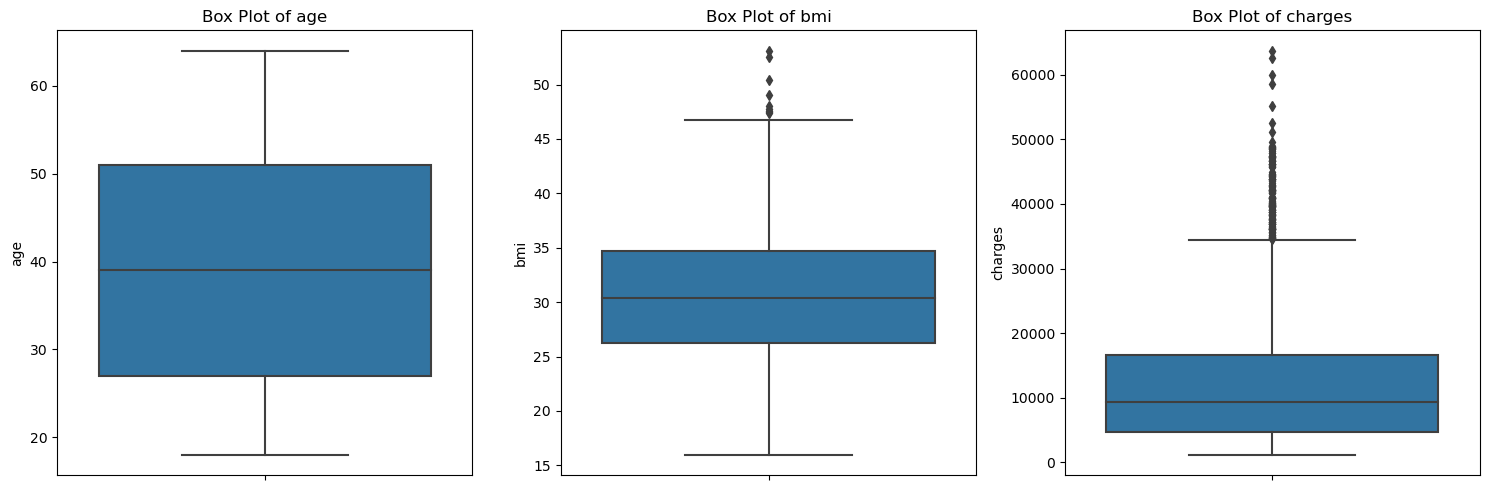

In [29]:
numerical_vars = ['age', 'bmi', 'charges']
plt.figure(figsize=(15, 5))
for i, var in enumerate(numerical_vars):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df[var])
    plt.title(f'Box Plot of {var}')
plt.tight_layout()
plt.show()

The box plots for age and bmi are symmetricly distributed with a few outliers, while charges display a right-skewed distribution with many outliers, indicating a spread of high charges above the median value.
Depending on the data and the domain removing these outliers may cause the model to represent wrong results for the high cost data if trained the model without peaking values. Therefore we will keep the outliers for final regression analysis

# Model Development:

1. Split the dataset into training and testing sets

In [51]:
from sklearn.model_selection import train_test_split

# Selecting features and target variable
X = encoded_data.drop('charges', axis=1)  # Features (excluding 'charges')
y = encoded_data['charges']  # Target variable

# Splitting the dataset into training (70%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the size of the training and testing sets
train_set_size = X_train.shape[0]
test_set_size = X_test.shape[0]

train_set_size, test_set_size

(1069, 268)

Splitted the data in training 80% and test 20%

In [52]:
from sklearn.linear_model import LinearRegression

# Creating a linear regression model
lr_model = LinearRegression()

# Training the model on the training set
lr_model.fit(X_train, y_train)

# The model is now trained. Next step is to evaluate its performance.
"Model Trained"

'Model Trained'

Trained the model 

2. Implement a linear regression model.

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# Predicting the charges using the testing set
y_pred = lr_model.predict(X_test)

# Calculating R-squared and Mean Squared Error
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

r_squared, mse

(0.8069287081198013, 0.24208632037687294)

3. Evaluate model performance using appropriate metrics (e.g., R-squared, Mean Squared 
Error).

The R-Square Values is approx 81% and the means squared error is 24%

This means that about 77% of the variance in the charges variable is explained by the model. This is generally considered a good R-squared value, indicating that the model fits the data well.
MSE is a measure of the average squared difference between the predicted and actual values. A lower MSE indicates a better fit.

In [55]:
# Extracting the coefficients of the linear regression model
coefficients = lr_model.coef_

# Creating a DataFrame for better visualization
features = X.columns
coefficients_df = pd.DataFrame(coefficients, features, columns=['Coefficient'])

coefficients_df.sort_values(by='Coefficient', ascending=False)

,Coefficient
smoker_yes,0.953167
age,0.287849
bmi,0.160543
children,0.053060
region_northeast,0.039027
region_northwest,0.006666
sex_female,0.004194
sex_male,-0.004194
region_southwest,-0.015421
region_southeast,-0.030272


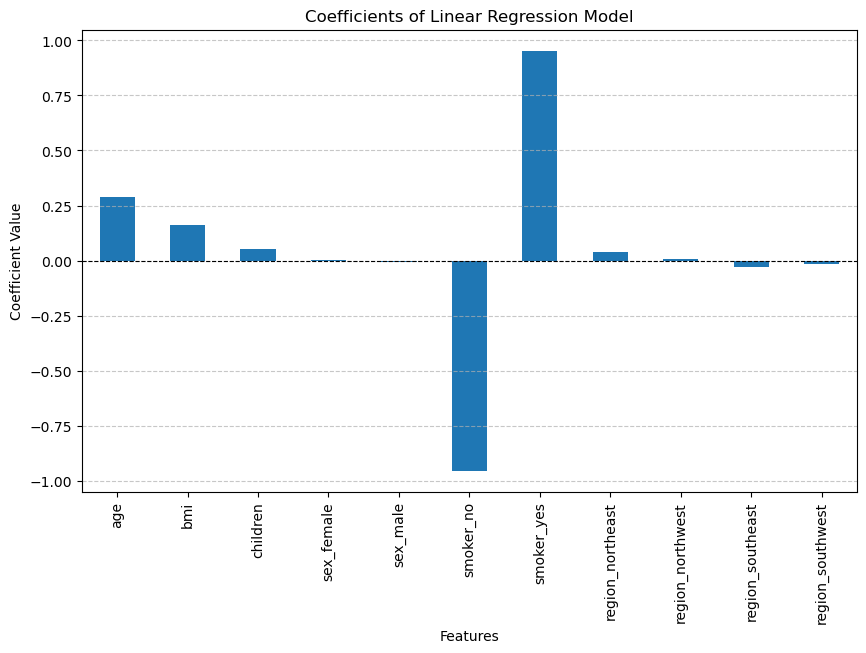

In [56]:
# Visualization of the coefficients in a bar plot

plt.figure(figsize=(10, 6))
coefficients_df['Coefficient'].plot(kind='bar')
plt.title('Coefficients of Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Model Interpretation:


1. Interpret the coefficients of the linear regression model.
2. Discuss the impact of different features on medical charges.

The smokeer yes status, age, bmi, children, regaion north east and west, and female status showed a positive relationship with the charges.

Explanation:

1. 'smoker_yes' has the strongest positive coefficient, indicating that being a smoker is the most important predictor of higher charges.
2. 'age' and 'bmi' also have positive coefficients, but less than smoking, showing that older age and higher BMI are associated with increased charges but to a lesser extent.
3. 'children' and the regions 'northeast' and 'northwest' have very small positive coefficients, suggesting a minor relationship with higher charges.
4. 'sex_female' and 'sex_male' have coefficients that are next to zero, indicating that sex has almost no linear relationship with charges.
5. Negative coefficients for 'region_southwest', 'region_southeast', and 'smoker_no' indicate these are associated with lower charges, with non-smokers ('smoker_no') having the largest negative effect, indicating the positive impact of 'smoker_yes'.

# Advanced Analysis (Optional):

1. Implement regularized linear models (Ridge, Lasso) to see if they yield better results.

In [57]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Define and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)  # alpha is the regularization strength
ridge_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

mse_ridge, r2_ridge

(0.2427320464159692, 0.806413721728274)

In [58]:
from sklearn.linear_model import Lasso

# Define and train the Lasso regression model
lasso_model = Lasso(alpha=0.01)  # alpha is the regularization strength
lasso_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso Regression - MSE: {mse_lasso}, R-squared: {r2_lasso}')

Lasso Regression - MSE: 0.2539263063125274, R-squared: 0.797485954903174


2. Conduct a sensitivity analysis to understand the robustness of the model.

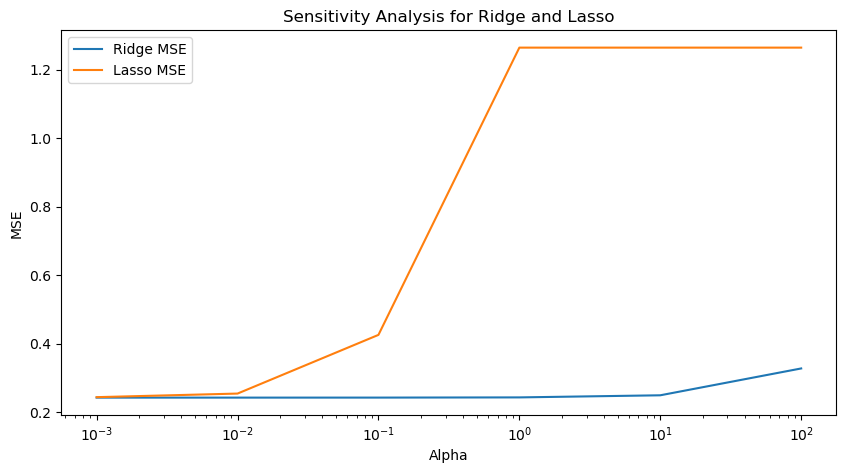

In [59]:
from sklearn.linear_model import Ridge, Lasso

# Range of alpha values to test
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Lists to store the performance metrics
ridge_mse = []
lasso_mse = []

# Loop over the alpha values
for alpha in alpha_values:
    # Ridge model
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_mse.append(mean_squared_error(y_test, ridge.predict(X_test)))

    # Lasso model
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_mse.append(mean_squared_error(y_test, lasso.predict(X_test)))

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(alpha_values, ridge_mse, label='Ridge MSE')
plt.plot(alpha_values, lasso_mse, label='Lasso MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('Sensitivity Analysis for Ridge and Lasso')
plt.legend()
plt.show()

Mean Squared Error (MSE):
This is a way of measuring how close the model's predictions are to the actual results. A lower MSE means the model's predictions are very close to the actual data, which is what we want.

Alpha:
Alpha is a tuning parameter that decides how much we want to penalize the model for having large coefficients, which are the numbers that get multiplied by our features (like age, bmi, etc.) to get the prediction. A higher alpha means more penalty.

Regularization (Ridge and Lasso):
This is like telling the model not to be too extreme or overconfident about the data. It's a technique to make the model more moderate, which can prevent it from making wild guesses on data it hasn't seen before (overfitting). Ridge and Lasso are two ways to do this.

Ridge: tries to reduce the size of coefficients evenly.
Lasso: can shrink some coefficients down to zero, effectively removing some features from influencing the predictions.

Interpretation of the Graph:

When alpha is very small (towards the left of the graph), both Ridge and Lasso are not penalizing much. This is like having a very lenient teacher who doesn't deduct many points for mistakes. But if we're too lenient, the model might "memorize" the training data, including the noise, which doesn't generalize well to new, unseen data.
  
As alpha increases (moving right), we start penalizing the model more, and the MSE decreases. This is the "sweet spot" where our model is learning the general trends without getting distracted by the noisy fluctuations in the training data.
  
When alpha gets too large (far right), the MSE for Lasso goes up a lot, which means the model is becoming too simple. It's like our teacher has become too strict, not giving the model enough flexibility to make accurate predictions. The model may be ignoring some of the features that are actually important by setting their coefficients to zero.

For Our Data:

The Ridge model seems to be relatively stable; even as we increase alpha, the MSE doesn't increase much. This suggests that Ridge regularization is maintaining a good balance and not losing important information.
  
The Lasso model starts to deteriorate more quickly as alpha increases. This suggests that for our data, the Lasso model might be too aggressive in eliminating features that are actually important for predicting the charges.

Summary: 
For our dataset, a moderate amount of regularization (not too little, not too much) seems to work best. Ridge appears more stable than Lasso as we change alpha, which could mean that all our features have some importance and shouldn't be eliminated.